In [0]:
import torch
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [3]:
wine = load_wine()
features =  2

# wine.target.shape
X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :features], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_test

tensor([2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2,
        0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1,
        0, 2, 1, 0, 1, 0])

In [0]:
class WineNet(torch.nn.Module):
    def __init__(self,n_input, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_input, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
n_input =  2
n_hidden =  5
wine_net = WineNet(n_input, n_hidden)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [32]:
batch_size =  10

test_history_list = list()
train_history_list = list()

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        test_history_list.append(loss(test_preds, y_test))
        test_preds = test_preds.argmax(dim=1)
        train_history_list.append(loss(preds, y_batch))
        print((test_preds == y_test).float().mean())

tensor(0.7778)
tensor(0.7778)
tensor(0.7963)
tensor(0.7963)
tensor(0.7778)
tensor(0.7963)
tensor(0.7778)
tensor(0.7778)
tensor(0.7963)
tensor(0.7778)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.7778)
tensor(0.8148)
tensor(0.7963)
tensor(0.7963)
tensor(0.7963)
tensor(0.7778)
tensor(0.7963)


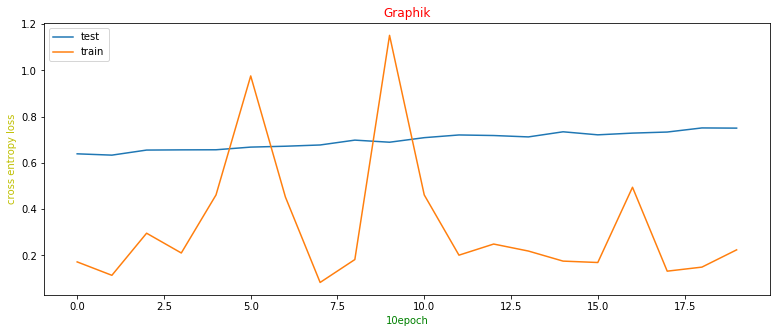

In [33]:
plt.plot(test_history_list, label="test")
plt.plot(train_history_list, label="train")

plt.title("Graphik", c='r');
plt.xlabel("10epoch", c='g');
plt.ylabel("cross entropy loss", c='y');
plt.legend(loc='upper left');